In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import IPython
import ipywidgets as widgets
import random
import seaborn
import plotly
from IPython.display import clear_output
from io import BytesIO

In [ ]:
#Loading xlsx file
def handle_upload(change):
    global df
    clear_output()
    if isinstance(upload_button.value, dict) and upload_button.value:
        uploaded_filename = list(upload_button.value.keys())[0]
        uploaded_file_data = upload_button.value[uploaded_filename]

        # Use BytesIO to wrap the file content
        content = BytesIO(uploaded_file_data['content'])

        try:
            # Read from the BytesIO object, now reading CSV
            df = pd.read_csv(content)
            print(f"File '{uploaded_filename}' uploaded successfully.")
            rows_input.disabled = False
            order_dropdown.disabled = False
            display(widgets.VBox([rows_input, order_dropdown, output_area]))
        except Exception as e:
            print(f"Error reading file: {e}")
            rows_input.disabled = True
            order_dropdown.disabled = True
            df = None
    else:
        print("No file uploaded or upload value is not in the expected format.")
        rows_input.disabled = True
        order_dropdown.disabled = True
        df = None

upload_button = widgets.FileUpload(
    accept='.csv',  # Changed to accept CSV files
    multiple=False
)

rows_input = widgets.Text(
    placeholder='Enter number of rows',
    disabled=True
)

order_dropdown = widgets.Dropdown(
    options=['In Order', 'Random'],
    value='In Order',
    description='Row Order:',
    disabled=True
)

output_area = widgets.Output()

df = None

def display_dataframe(b=None):
    global df
    with output_area:
        clear_output()
        if df is not None:
            try:
                num_rows_str = rows_input.value.lower()
                if num_rows_str == 'all':
                    num_rows = len(df)
                else:
                    num_rows = int(num_rows_str)

                if num_rows > len(df):
                    print(f"Warning: Requested {num_rows} rows, but only {len(df)} available. Displaying all rows.")
                    num_rows = len(df)

                if order_dropdown.value == 'Random':
                    if num_rows == len(df):
                         display(df)
                    else:
                        display(df.sample(n=num_rows))
                else:
                    display(df.head(num_rows))
            except ValueError:
                print("Please enter a valid number or 'all'.")
            except Exception as e:
                print(f"An error occurred: {e}")

upload_button.observe(handle_upload, names='value')
rows_input.observe(display_dataframe, names='value')
order_dropdown.observe(display_dataframe, names='value')

display(upload_button)

Data Sample:


,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,8260-NGFNY,42.5,Month-to-month,No,Mailed check,25.2,25.20,Female,0,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2,2359-QWQUL,39.0,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,3,6598/RFFVI,2.0,One year,No,Credit card (automatic),19.3,28.30,Male,0,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,4,IXSTS-8780,6.0,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,5,2674/MIAHT,42.5,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        257 non-null    int64  
 1   customerID        257 non-null    object 
 2   tenure            257 non-null    float64
 3   Contract          257 non-null    object 
 4   PaperlessBilling  257 non-null    object 
 5   PaymentMethod     257 non-null    object 
 6   MonthlyCharges    257 non-null    float64
 7   TotalCharges      257 non-null    float64
 8   gender            257 non-null    object 
 9   SeniorCitizen     257 non-null    object 
 10  Partner           257 non-null    object 
 11  Dependents        257 non-null    object 
 12  PhoneService      257 non-null    object 
 13  MultipleLines     257 non-null    object 
 14  InternetService   257 non-null    object 
 15  OnlineSecurity    257 non-null    object 
 16  OnlineBackup      257 non-null    object 
 1

'Model Evaluation Metrics:'

,Model,Accuracy,Precision,Recall,Specificity,F1-Score,AUC
0,Logistic Regression,0.6923,0.5000,0.4375,0.8056,0.4667,0.6354
1,Decision Tree (sklearn),0.7500,0.7143,0.3125,0.9444,0.4348,0.7491


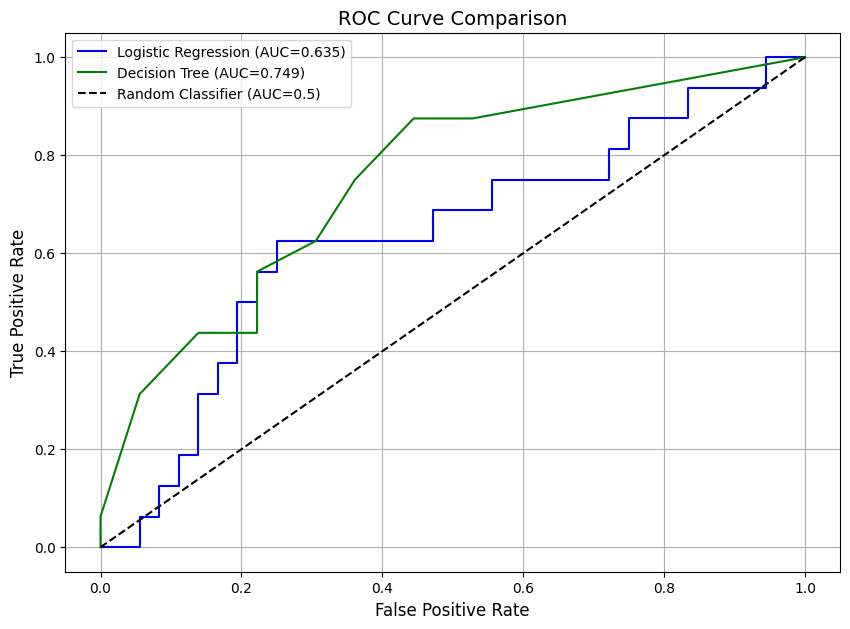

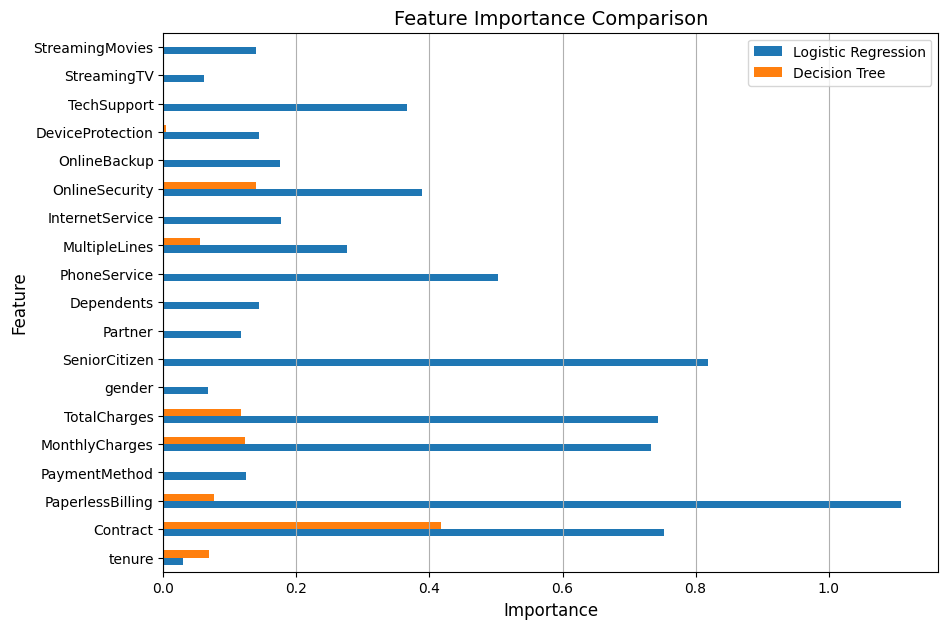

Best model (Decision Tree) saved as 'best_churn_model.joblib'.
The best performing model is the Decision Tree based on AUC.


'Model Evaluation Metrics:'

,Model,Accuracy,Precision,Recall,Specificity,F1-Score,AUC
0,Logistic Regression,0.6923,0.5000,0.4375,0.8056,0.4667,0.6354
1,Decision Tree (sklearn),0.7500,0.7143,0.3125,0.9444,0.4348,0.7491


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, precision_score, recall_score, f1_score
import warnings
import joblib

warnings.filterwarnings('ignore')


if 'df' in locals() and df is not None:
    try:
        print("Data Sample:")
        display(df.head())
        print(df.info())
        print("Missing values:\n", df.isnull().sum())

        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

        if 'customerID' in categorical_cols:
            categorical_cols.remove('customerID')
        if 'Churn' in categorical_cols:
            categorical_cols.remove('Churn')
        if 'Unnamed: 0' in numerical_cols:
            numerical_cols.remove('Unnamed: 0')
        if 'SeniorCitizen' in numerical_cols:
            numerical_cols.remove('SeniorCitizen')

        if 'tenure' in df.columns:
            df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
            if 'tenure' not in numerical_cols:
                numerical_cols.append('tenure')
        else:
            print("Warning: 'tenure' column not found in the dataframe.")

        for col in numerical_cols:
             if col in df.columns:
                df[col].fillna(df[col].median(), inplace=True)

        if 'SeniorCitizen' in df.columns:
            df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)
            df['SeniorCitizen'] = df['SeniorCitizen'].astype(int).astype(object)
            if 'SeniorCitizen' not in categorical_cols:
                categorical_cols.append('SeniorCitizen')
            if 'SeniorCitizen' in numerical_cols:
                numerical_cols.remove('SeniorCitizen')

        X = df.drop(['customerID', 'Churn', 'Unnamed: 0'], axis=1, errors='ignore')
        y = df['Churn']

        if y.dtype == 'object':
            le_churn = LabelEncoder()
            y = le_churn.fit_transform(y)
            print("Encoded 'Churn' column.")

        le_dict = {}
        for col in categorical_cols:
            if col in X.columns:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col])
                le_dict[col] = le
            else:
                print(f"Warning: Categorical column '{col}' not found in the dataframe features.")

        numerical_cols_present_in_X = [col for col in numerical_cols if col in X.columns]
        if numerical_cols_present_in_X:
            scaler = StandardScaler()
            X[numerical_cols_present_in_X] = scaler.fit_transform(X[numerical_cols_present_in_X])
        else:
            print("Warning: No numerical columns found for scaling in the features.")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        lr_model = LogisticRegression(random_state=42, max_iter=1000)
        lr_model.fit(X_train, y_train)
        y_pred_lr = lr_model.predict(X_test)
        y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

        dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
        dt_model.fit(X_train, y_train)
        y_pred_dt = dt_model.predict(X_test)
        y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

        def calculate_metrics(y_true, y_pred, y_prob=None):
            acc = accuracy_score(y_true, y_pred)
            cm = confusion_matrix(y_true, y_pred)
            tn, fp, fn, tp = cm.ravel()
            prec = tp / (tp + fp) if (tp + fp) > 0 else 0
            rec = tp / (tp + fn) if (tp + fn) > 0 else 0
            spec = tn / (tn + fp) if (tn + fp) > 0 else 0
            f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
            metrics = {'accuracy': acc, 'precision': prec, 'recall': rec, 'specificity': spec, 'f1_score': f1, 'confusion_matrix': cm}
            if y_prob is not None:
                try:
                    metrics['auc'] = roc_auc_score(y_true, y_prob)
                except ValueError:
                     metrics['auc'] = None

            return metrics

        lr_metrics = calculate_metrics(y_test, y_pred_lr, y_prob_lr)
        dt_metrics = calculate_metrics(y_test, y_pred_dt, y_prob_dt)

        metrics_data = {
            'Model': ['Logistic Regression', 'Decision Tree (sklearn)'],
            'Accuracy': [lr_metrics['accuracy'], dt_metrics['accuracy']],
            'Precision': [lr_metrics['precision'], dt_metrics['precision']],
            'Recall': [lr_metrics['recall'], dt_metrics['recall']],
            'Specificity': [lr_metrics['specificity'], dt_metrics['specificity']],
            'F1-Score': [lr_metrics['f1_score'], dt_metrics['f1_score']],
            'AUC': [lr_metrics.get('auc', None), dt_metrics.get('auc', None)]
        }
        metrics_df = pd.DataFrame(metrics_data)
        display("Model Evaluation Metrics:", metrics_df.round(4))

        plt.figure(figsize=(10, 7))
        if lr_metrics.get('auc') is not None:
            fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
            plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_metrics["auc"]:.3f})', color='blue')
        if dt_metrics.get('auc') is not None:
            fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
            plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={dt_metrics["auc"]:.3f})', color='green')

        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.5)')
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curve Comparison', fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.show()

        feature_names = X_train.columns.tolist()
        plot_feature_importance = False
        importance_data = {'feature': feature_names}

        if hasattr(lr_model, 'coef_') and lr_model.coef_.shape[1] == len(feature_names):
            importance_data['Logistic Regression'] = abs(lr_model.coef_[0])
            plot_feature_importance = True
        else:
            print("Warning: Logistic Regression coefficients or feature names not available or shape mismatch. Skipping LR feature importance.")

        if hasattr(dt_model, 'feature_importances_') and len(dt_model.feature_importances_) == len(feature_names):
            importance_data['Decision Tree'] = dt_model.feature_importances_
            plot_feature_importance = True
        else:
            print("Warning: Decision Tree feature importances not available or shape mismatch. Skipping DT feature importance.")

        if plot_feature_importance:
            importance_df = pd.DataFrame(importance_data)
            importance_df = importance_df.set_index('feature')
            importance_df.plot(kind='barh', figsize=(10, 7))
            plt.title('Feature Importance Comparison', fontsize=14)
            plt.xlabel('Importance', fontsize=12)
            plt.ylabel('Feature', fontsize=12)
            plt.legend(fontsize=10)
            plt.grid(axis='x')
            plt.show()
        else:
            print("Skipping Feature Importance plot due to missing data.")

        lr_auc = lr_metrics.get('auc', 0) if lr_metrics.get('auc') is not None else 0
        dt_auc = dt_metrics.get('auc', 0) if dt_metrics.get('auc') is not None else 0

        if lr_auc >= dt_auc:
            best_model = lr_model
            model_name = 'Logistic Regression'
        else:
            best_model = dt_model
            model_name = 'Decision Tree'

        try:
            joblib.dump(best_model, 'best_churn_model.joblib')
            print(f"Best model ({model_name}) saved as 'best_churn_model.joblib'.")
        except Exception as e:
            print(f"Error saving model: {e}")

        print(f"The best performing model is the {model_name} based on AUC.")
        display("Model Evaluation Metrics:", metrics_df.round(4))

    except Exception as e:
        print(f"An error occurred during processing and modeling: {e}")
else:
    print("DataFrame 'df' not found. Please ensure you have run the cell to load your data.")